In [40]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mp
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
mp.rcParams['figure.figsize'] = (12,8)  #Adjusts the configuration of the plots we will create


#Read in the data

df= pd.read_csv(r'C:\Users\asus\Downloads\movies.csv')



In [41]:
# Let's Look at the Data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [42]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing= np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [43]:
# Data types for our Columns

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [44]:
# Change data types of Columns

df['budget']= df['budget'].astype('int64')

df['gross']= df['gross'].astype('int64')

In [33]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016,2016


In [45]:
#Create Correct Year Column

df['yearcorrect']= df['released'].astype(str).str[:4]

df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016,2016


In [46]:
pd.set_option('display.max_rows', None)

In [47]:
df= df.sort_values(by=['gross'], inplace=False, ascending=False)

In [69]:
# Drop any duplicates

#df['company'].drop_duplicates().sort_values(ascending= False)

In [49]:
# Budget has high correlation
# Company high correlation

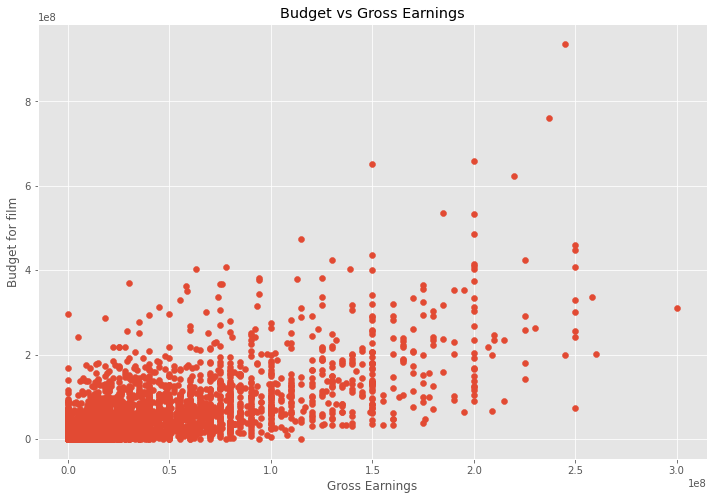

In [50]:
# Scatter plot with budget vs gross using pyplot

plt.scatter (x=df['budget'], y=df['gross'])

plt.title ('Budget vs Gross Earnings')

plt.xlabel ('Gross Earnings')

plt.ylabel ('Budget for film')

plt.show()

In [51]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


<AxesSubplot:xlabel='budget', ylabel='gross'>

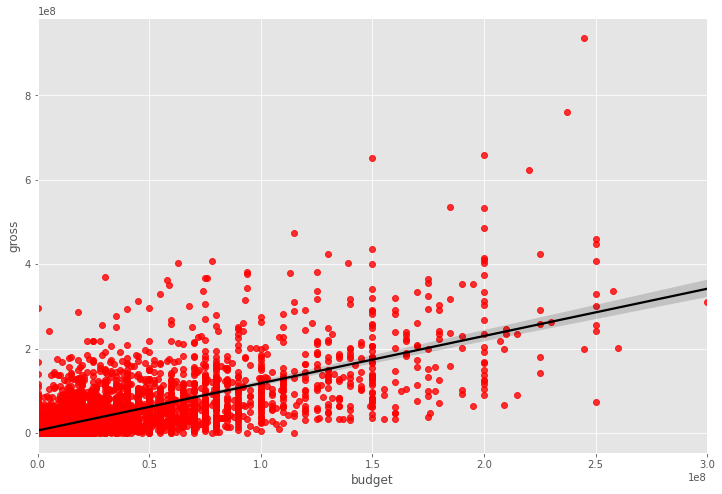

In [52]:
# Plot the budget vs gross using seaborn

sns.regplot (x= 'budget', y='gross', data= df, scatter_kws= {"color":"red"}, line_kws= {"color":"black"})

In [53]:
# Looking at Correlation

df.corr() #Works only with numbers

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [54]:
#pearson, kendall, spearman
#pearson is being used by default

df.corr(method='kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.523459,0.164816,-0.019526,0.451137,0.214114
gross,0.523459,1.000000,0.139270,0.033163,0.479772,0.098585
runtime,0.164816,0.139270,1.000000,0.282068,0.195640,0.073785
score,-0.019526,0.033163,0.282068,1.000000,0.272967,0.070451
votes,0.451137,0.479772,0.195640,0.272967,1.000000,0.339625
year,0.214114,0.098585,0.073785,0.070451,0.339625,1.000000


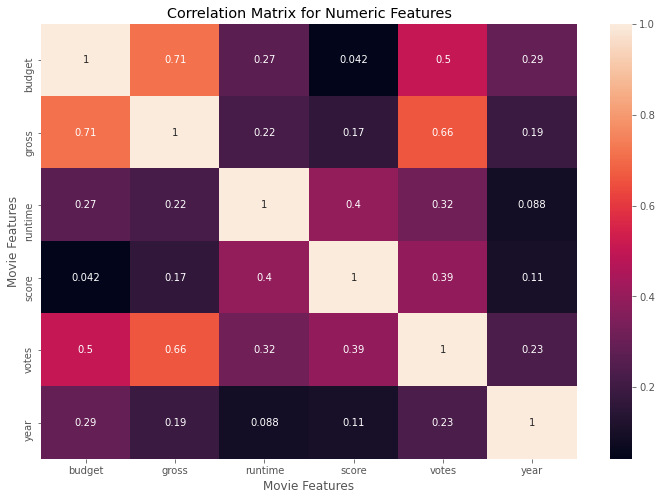

In [56]:
# High correlation between buget and gross

correlation_matrix = df.corr(method='pearson')

sns.heatmap (correlation_matrix, annot=True)

plt.title ('Correlation Matrix for Numeric Features')

plt.xlabel ('Movie Features')

plt.ylabel ('Movie Features')

plt.show()

In [34]:
#Looks at Company

df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype ('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes
        
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000.0,1428,54,1037,0,936662225.0,4679,7,2290,136,8.1,475,687192,2356,2015
5061,237000000.0,2062,53,1066,0,760507625.0,501,7,1800,162,7.8,2084,954412,1629,2009
2420,200000000.0,2062,54,1066,6,658672302.0,6177,7,910,194,7.8,1444,862554,1629,1997
6391,150000000.0,2085,54,466,0,652270625.0,2721,7,2247,124,7.0,404,469200,3310,2015
5723,220000000.0,1491,54,1412,0,623357910.0,4995,7,1987,143,8.1,2001,1064633,2145,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0.0,2171,35,2071,0,547.0,2577,8,2059,104,7.2,748,16609,2981,2012
5699,0.0,1262,53,2385,4,542.0,5204,6,1977,89,6.2,1335,9018,2903,2011
6066,0.0,631,54,2484,5,441.0,2459,8,2125,106,5.7,1047,21070,2901,2013
2594,15000000.0,764,54,883,4,309.0,6257,7,895,84,5.7,2459,5034,217,1997


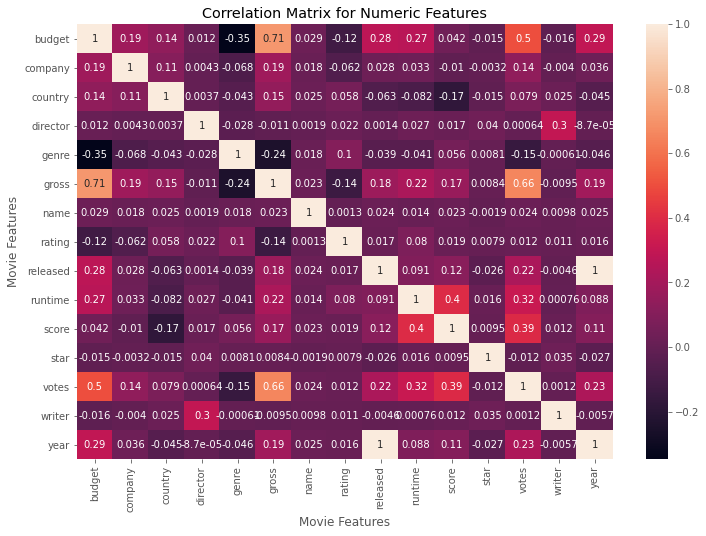

In [58]:
# High correlation between buget and gross

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap (correlation_matrix, annot=True)

plt.title ('Correlation Matrix for Numeric Features')

plt.xlabel ('Movie Features')

plt.ylabel ('Movie Features')

plt.show()

In [60]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.276635,0.268226,0.042145,-0.015062,0.503924,-0.015611,0.291009
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.027898,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.036272
country,0.137635,0.107950,1.000000,0.003699,-0.042793,0.149988,0.025020,0.057979,-0.062609,-0.081796,-0.174414,-0.014569,0.078657,0.024982,-0.045204
director,0.011602,0.004320,0.003699,1.000000,-0.027669,-0.011429,0.001906,0.021926,0.001440,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000087
genre,-0.346794,-0.068330,-0.042793,-0.027669,1.000000,-0.242676,0.018062,0.100960,-0.039179,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.178564,0.224579,0.165693,0.008381,0.662457,-0.009455,0.191548
name,0.028712,0.018098,0.025020,0.001906,0.018062,0.022768,1.000000,0.001289,0.024120,0.013942,0.023342,-0.001910,0.023665,0.009821,0.024624
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001289,1.000000,0.016696,0.079542,0.019271,0.007891,0.011678,0.010741,0.016221
released,0.276635,0.027898,-0.062609,0.001440,-0.039179,0.178564,0.024120,0.016696,1.000000,0.091102,0.119577,-0.025506,0.221736,-0.004634,0.996187
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.091102,1.000000,0.395343,0.016019,0.317399,0.000759,0.087639


In [68]:
correlation_mat= df_numerized.corr()

corr_pairs= correlation_mat.unstack()

#corr_pairs

In [67]:
sorted_pairs= corr_pairs.sort_values()

#sorted_pairs

In [66]:
high_corr= sorted_pairs[(sorted_pairs)> 0.5]

high_corr

votes     budget      0.503924
budget    votes       0.503924
votes     gross       0.662457
gross     votes       0.662457
budget    gross       0.712196
gross     budget      0.712196
released  year        0.996187
year      released    0.996187
budget    budget      1.000000
rating    rating      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
name      name        1.000000
gross     gross       1.000000
genre     genre       1.000000
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
dtype: float64

In [ ]:
# Votes and Budget have the highest correlation to gross earnings

# Company has low correlation

